In [35]:


#%run ./scripts/setup.py

import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
from PIL import Image
!pip install -U scikit-image
import skimage
import skimage.feature
#from skimage.io import imread
#from skimage import io

from skimage.feature import graycomatrix, graycoprops
#from skimage.feature import greycoprops

import pandas as pd


import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.decomposition import PCA
from pydub import AudioSegment
home = os.getcwd()

import cv2

from scipy import signal
from scipy.signal import find_peaks


# <center>Research in Ultrasound Imaging  </center> 
<br>


## <center>Detail of Some Approaches </center>




<center>Fintan J. McEvoy</center>

<br><br><br><br>
<center><font color=brown>University of Copenhagen</font></center>


Ultrasonographic predictors of response of European eels (Anguilla anguilla) to hormonal treatment for induction of ovarian development<br>
Anna V. Müller, Fintan J. McEvoy, Jonna Tomkiewicz, Sebastian N. Politis, \& José M. Amigo<br>
American Journal of Veterinary Research, https://doi.org/10.2460/ajvr.77.5.478<br><br><br>

Fingerprinting of Doppler audio signals from the common carotid artery<br>
Anna V. Müller, José M. Amigo, Nicoline R. Wichmann1, Frederik B. Witschas \& Fintan J. McEvoy<br>
Scientific Reports, https://doi.org/10.1038/s41598-020-59274-y

## Looking for texture differences

### Using the grey co matrix

In [2]:
image = cv2.imread(home+"/images/GCM.png")


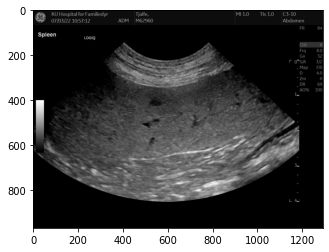

(970, 1292)

In [3]:
#Get image data as an array
img = Image.open(home+'/images/spleen_us.jpg')
gray_image=img.convert('L')
gray_image_array=np.asarray(gray_image)
plt.imshow(gray_image_array,cmap='gray', vmin = 0, vmax = 255)
plt.show()
global image_grey
image_grey = gray_image_array
image_grey.shape

In [4]:
def spleenTexture(image):

    PATCH_SIZE = 140

    #image = data.image()
    # select some patches from spleeny areas of the image
    spleen_locations = [(375, 350), (375, 450), (375, 550), (375, 750)]
    spleen_patches = []
    for loc in spleen_locations:
        spleen_patches.append(image[loc[0]:loc[0] + PATCH_SIZE,
                                   loc[1]:loc[1] + PATCH_SIZE])

    # select some patches from adipose areas of the image
    adipose_locations = [(650, 250), (650, 350), (650, 450), (650, 550)]
    adipose_patches = []
    for loc in adipose_locations:
        adipose_patches.append(image[loc[0]:loc[0] + PATCH_SIZE,
                                 loc[1]:loc[1] + PATCH_SIZE])
    # compute some GLCM properties each patch
    global us
    us = []
    global vs
    vs = []
    global ws
    ws = []
    global xs
    xs = []
    global ys
    ys = []
    global zs
    zs = []
    for i, patch in enumerate(spleen_patches + adipose_patches):
        glcm = graycomatrix(patch, [5], [0], 256, symmetric=True, normed=True)
    
        us.append(graycoprops(glcm, 'ASM')[0, 0])    
        vs.append(graycoprops(glcm, 'contrast')[0, 0])
        ws.append(graycoprops(glcm, 'energy')[0, 0])    
        xs.append(graycoprops(glcm, 'dissimilarity')[0, 0])
        ys.append(graycoprops(glcm, 'correlation')[0, 0])
        zs.append(graycoprops(glcm, 'homogeneity')[0, 0])

    # create the figure
    plt.figure(figsize=(12, 12))

    # display the image patches
    for i, patch in enumerate(spleen_patches):
        plt.subplot(3, len(spleen_patches), len(spleen_patches) * 1 + i + 1)
        plt.imshow(patch, cmap=plt.cm.gray, interpolation='nearest',
               vmin=0, vmax=255)
        plt.xlabel('Spleen %d' % (i + 1))

    for i, patch in enumerate(adipose_patches):
        plt.subplot(3, len(spleen_patches), len(spleen_patches) * 2 + i + 1)
        plt.imshow(patch, cmap=plt.cm.gray, interpolation='nearest',
                   vmin=0, vmax=255)
        plt.xlabel('Adipose %d' % (i + 1))

    # display original image with locations of patches
    plt.subplot(3, 2, 1)
    plt.imshow(image, cmap=plt.cm.gray, interpolation='nearest',
               vmin=0, vmax=255)
    for (y, x) in spleen_locations:
        plt.plot(x + PATCH_SIZE / 2, y + PATCH_SIZE / 2, 'gs')
    for (y, x) in adipose_locations:
        plt.plot(x + PATCH_SIZE / 2, y + PATCH_SIZE / 2, 'bs')
    plt.xlabel('Original Image')
    plt.xticks([])
    plt.yticks([])
    plt.axis('image')

    # for each patch, plot (dissimilarity, correlation)
    plt.subplot(3, 2, 2)
    plt.plot(xs[:len(spleen_patches)], ys[:len(spleen_patches)], 'go',
             label='Spleen')
    plt.plot(xs[len(spleen_patches):], ys[len(spleen_patches):], 'bo',
             label='Adipose')
    plt.xlabel('GLCM Dissimilarity')
    plt.ylabel('GLVM Correlation')
    plt.legend()

    # display the patches and plot
    plt.suptitle('Grey level co-occurrence matrix features', fontsize=14)
    plt.show()
    #print(len(spleen_patches))
    
def GCM():
    #Generate df of greycomatrix parameters
    #create a list of columns names
    global column_values
    column_values = ['ASM', 'contrast','energy','dissimilarity', 'correlation', 'homogeneity']
    #create list of index values
    global index_values
    index_values = ['spleen_1','spleen_2','spleen_3','spleen_4','adipose_1','adipose_2','adipose_3','adipose_4']

    array=np.array([
        [us[0], vs[0], ws[0], xs[0], ys[0], zs[0]],
        [us[1], vs[1], ws[1], xs[1], ys[1], zs[1]],
        [us[2], vs[2], ws[2], xs[2], ys[2], zs[2]],
        [us[3], vs[3], ws[3], xs[3], ys[3], zs[3]],
        [us[4], vs[4], ws[4], xs[4], ys[4], zs[4]],
        [us[5], vs[5], ws[5], xs[5], ys[5], zs[5]],
        [us[6], vs[6], ws[6], xs[6], ys[6], zs[6]],
        [us[7], vs[7], ws[7], xs[7], ys[7], zs[7]]
        ])

    # creating the dataframe
    global df
    df = pd.DataFrame(data = array, 
                      index = index_values, 
                      columns = column_values)
  
    # displaying the dataframe
    return(df)

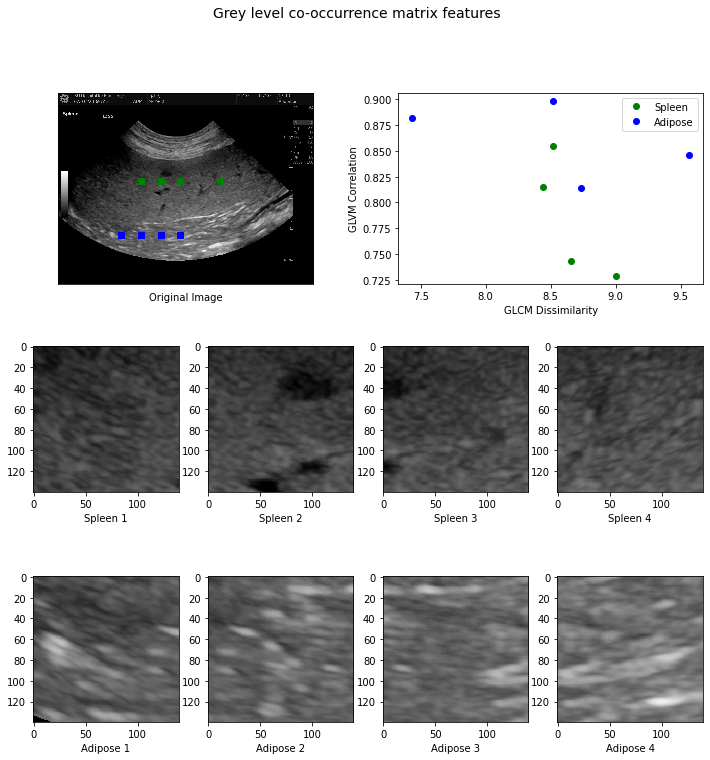

In [5]:
spleenTexture(image_grey)

In [6]:
def GCM():
    #Generate df of greycomatrix parameters
    #create a list of columns names
    global column_values
    column_values = ['ASM', 'contrast','energy','dissimilarity', 'correlation', 'homogeneity']
    #create list of index values
    global index_values
    index_values = ['spleen_1','spleen_2','spleen_3','spleen_4','adipose_1','adipose_2','adipose_3','adipose_4']
    
    global array
    array=np.array([
        [us[0], vs[0], ws[0], xs[0], ys[0], zs[0]],
        [us[1], vs[1], ws[1], xs[1], ys[1], zs[1]],
        [us[2], vs[2], ws[2], xs[2], ys[2], zs[2]],
        [us[3], vs[3], ws[3], xs[3], ys[3], zs[3]],
        [us[4], vs[4], ws[4], xs[4], ys[4], zs[4]],
        [us[5], vs[5], ws[5], xs[5], ys[5], zs[5]],
        [us[6], vs[6], ws[6], xs[6], ys[6], zs[6]],
        [us[7], vs[7], ws[7], xs[7], ys[7], zs[7]]
        ])

    # creating the dataframe
    global df
    df = pd.DataFrame(data = array, index = index_values, columns = column_values)
    

    x = df.values #returns a numpy array
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    return(df)


In [7]:
GCM()
df=GCM()
df



,ASM,contrast,energy,dissimilarity,correlation,homogeneity
spleen_1,0.000558,118.729630,0.023628,8.658307,0.743677,0.108868
spleen_2,0.000475,120.110317,0.021790,8.519418,0.854900,0.115629
spleen_3,0.000514,111.622751,0.022671,8.439683,0.815288,0.110281
spleen_4,0.000521,132.102646,0.022831,9.003492,0.728924,0.107575
adipose_1,0.000457,188.491852,0.021388,9.564233,0.845892,0.118905
adipose_2,0.000585,142.842857,0.024181,8.734497,0.814367,0.123020
adipose_3,0.000698,93.902487,0.026423,7.434550,0.882034,0.133009
adipose_4,0.000425,123.147619,0.020623,8.519365,0.898065,0.120813


In [8]:
def DataNorm():
    global x
    x = df.values #returns a numpy array
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)

    global df_norm
    df_norm = pd.DataFrame(x_scaled,index = index_values, columns = column_values)
    label = ['spleen', 'spleen', 'spleen', 'spleen', 'adipose','adipose','adipose','adipose']
    df_norm['label'] = label
    targets=['spleen','adipose']
    return(df_norm)


In [9]:
df_norm=DataNorm()
df_norm

,ASM,contrast,energy,dissimilarity,correlation,homogeneity,label
spleen_1,0.487365,0.262473,0.518143,0.574619,0.087219,0.050857,spleen
spleen_2,0.181277,0.277070,0.201081,0.509403,0.744798,0.316689,spleen
spleen_3,0.324823,0.187339,0.352977,0.471963,0.510599,0.106415,spleen
spleen_4,0.351622,0.403853,0.380686,0.736702,0.000000,0.000000,spleen
adipose_1,0.117758,1.000000,0.131871,1.000000,0.691540,0.445476,adipose
adipose_2,0.584264,0.517398,0.613496,0.610395,0.505156,0.607277,adipose
adipose_3,1.000000,0.000000,1.000000,0.000000,0.905222,1.000000,adipose
adipose_4,0.000000,0.309180,0.000000,0.509379,1.000000,0.520492,adipose


In [10]:
df_norm.describe()

,ASM,contrast,energy,dissimilarity,correlation,homogeneity
count,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
mean,0.380889,0.369664,0.399782,0.551558,0.555567,0.380901
std,0.314905,0.296150,0.314775,0.281191,0.359890,0.336296
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.165397,0.243689,0.183778,0.500025,0.400671,0.092525
50%,0.338222,0.293125,0.366831,0.542011,0.601070,0.381083
75%,0.511590,0.432239,0.541981,0.641972,0.784904,0.542189
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
#Run the PCA
x=df.values
pca_texture = PCA(n_components=2)
principalComponents_texture = pca_texture.fit_transform(x)

#Create a dataframe of components
global principal_texture_Df
principal_texture_Df = pd.DataFrame(data = principalComponents_texture ,
                                    columns = ['principal component 1', 'principal component 2']
                                    , index=['spleen_1','spleen_2','spleen_3','spleen_4','adipose_1','adipose_2','adipose_3','adipose_4'])

In [12]:
principal_texture_Df

,principal component 1,principal component 2
spleen_1,-10.136346,-0.252422
spleen_2,-8.758577,-0.071432
spleen_3,-17.246113,-0.159202
spleen_4,3.240823,-0.343338
adipose_1,59.630447,0.185146
adipose_2,13.973936,0.138544
adipose_3,-34.982335,0.509804
adipose_4,-5.721836,-0.007099


In [13]:
def PlotPCA(principal_texture_Df, df_norm):
    plt.figure()
    plt.figure(figsize=(10,10))
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=14)
    plt.xlabel('Principal Component - 1',fontsize=20)
    plt.ylabel('Principal Component - 2',fontsize=20)
    plt.title("Principal Component Analysis of Texture Dataset",fontsize=20)
    targets = ['spleen', 'adipose']
    colors = ['r', 'g']
    for target, color in zip(targets,colors):
        indicesToKeep = df_norm['label'] == target
        plt.scatter(principal_texture_Df.loc[indicesToKeep, 'principal component 1']
                   , principal_texture_Df.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

    plt.legend(targets,prop={'size': 15})

<Figure size 432x288 with 0 Axes>

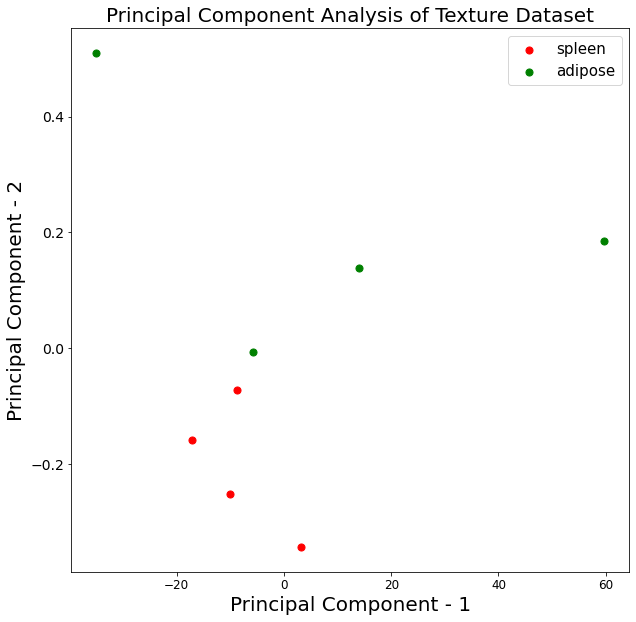

In [14]:
PlotPCA(principal_texture_Df, df_norm)

In [15]:
print('Explained variation per principal component: {}'.format(pca_texture.explained_variance_ratio_))

Explained variation per principal component: [9.99902058e-01 9.56181709e-05]


In [16]:
array_loadings=(abs( pca_texture.components_ ))
df_pca_loadings = pd.DataFrame(pca_texture.components_)
df_loadings = pd.DataFrame(array_loadings, 
                  index = ['PC1', 'PC2'], 
                  columns = ['ASM', 'contrast','energy','dissimilarity', 'correlation', 'homogeneity'])
df_loadings

,ASM,contrast,energy,dissimilarity,correlation,homogeneity
PC1,0.000002,0.999818,0.000032,0.019071,0.000163,0.000037
PC2,0.000158,0.018845,0.003169,0.986536,0.159623,0.030025


### <center>oooOooo</center>

## <center>Working with Doppler data</center>

In [29]:
#!pip install pydub

def PowerSpectrum(path_to_mp3):
    from pydub import AudioSegment
    audio_file = AudioSegment.from_file(path_to_mp3)
    
    # This will open and read the audio file with pydub.  Replace the file path with
    # your own file.


    # Set up a list for us to dump PCM samples into, and create a 'data' variable
    # so we don't need to type audio_file._data again
    data = audio_file._data
    global pcm16_signed_integers
    pcm16_signed_integers = []

    # This loop decodes the bytestring into PCM samples.
    # The bytestring is a stream of little-endian encoded signed integers.
    # This basically just cuts each two-byte sample out of the bytestring, converts
    # it to an integer, and appends it to the list of samples.
    for sample_index in range(len(data)//2):
        sample = int.from_bytes(data[sample_index*2:sample_index*2+2], 'little', signed=True)
        pcm16_signed_integers.append(sample)

    # Now plot the samples!
    plt.plot(pcm16_signed_integers)
    plt.show()

In [32]:
exist = !which ffmpeg
if not exist:
  !curl https://johnvansickle.com/ffmpeg/releases/ffmpeg-release-amd64-static.tar.xz -o ffmpeg.tar.xz \
     && tar -xf ffmpeg.tar.xz && rm ffmpeg.tar.xz
  ffmdir = !find . -iname ffmpeg-*-static
  path = %env PATH
  path = path + ':' + ffmdir[0]
  %env PATH $path
print('')
!which ffmpeg
print('Done!')

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 38.9M  100 38.9M    0     0  12.3M      0  0:00:03  0:00:03 --:--:-- 12.3M.9M    7 3127k    0     0  2928k      0  0:00:13  0:00:01  0:00:12 2925k
env: PATH=/srv/conda/envs/notebook/bin:/srv/conda/condabin:/home/jovyan/.local/bin:/home/jovyan/.local/bin:/srv/conda/envs/notebook/bin:/srv/conda/bin:/srv/npm/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:./ffmpeg-5.0.1-amd64-static

./ffmpeg-5.0.1-amd64-static/ffmpeg
Done!


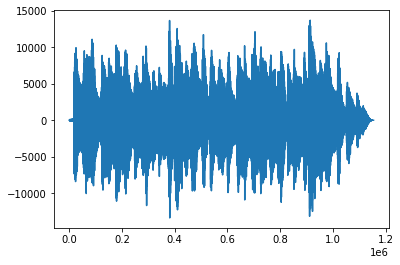

In [33]:
PowerSpectrum(home+"/images/cross.mp3")

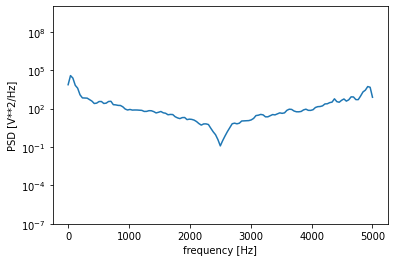

In [36]:
fs = 10e3
f, Pxx_den = signal.welch(pcm16_signed_integers, fs)
plt.semilogy(f, Pxx_den)
plt.ylim([1e-7, 1e10])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

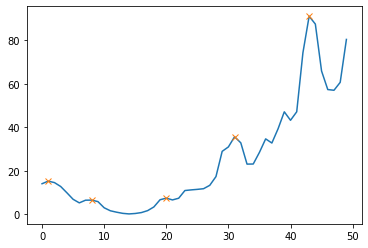

In [37]:
#Find peaks from scipy.signal "find_peaks"
x=Pxx_den[50:100]
peaks, _ = find_peaks(x, height=0)
peaks, properties=find_peaks(x, height=0, width=1)
plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.show()

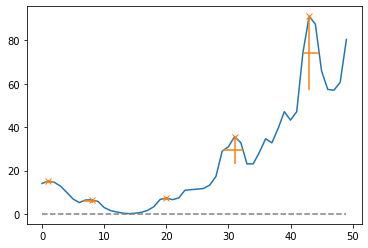

In [38]:

plt.plot(x)

plt.plot(peaks, x[peaks], "x")
plt.plot(np.zeros_like(x), "--", color="gray")
plt.vlines(x=peaks, ymin=x[peaks] - properties["prominences"],
ymax = x[peaks], color = "C1")
plt.hlines(y=properties["width_heights"], xmin=properties["left_ips"],

           xmax=properties["right_ips"], color = "C1")
plt.show()

### <center>oooOooo</center>

# <center>Ultrasound Image analysis and  statistics </center> 
<br>

<center>using</center>


## <center>Python</center>


## <center>Principal Component Analsyis</center>

<br>

<center>Fintan J. McEvoy</center>

<br><br><br><br>
<center><font color=brown>University of Copenhagen</font></center>

In [40]:


%load_ext watermark

# python, ipython, packages, and machine characteristics
%watermark -v -m -p os,wget,pandas,skimage,sklearn,scipy,numpy,matplotlib,cv2,pydub,watermark 

# date
print (" ")
%watermark -u -n -t -z 



Python implementation: CPython
Python version       : 3.7.12
IPython version      : 7.32.0

os        : unknown
wget      : 3.2
pandas    : 1.3.5
skimage   : 0.19.2
sklearn   : 0.0
scipy     : 1.7.3
numpy     : 1.21.6
matplotlib: 3.5.2
cv2       : 4.5.5
pydub     : 0.25.1
watermark : 2.3.1

Compiler    : GCC 9.4.0
OS          : Linux
Release     : 5.4.170+
Machine     : x86_64
Processor   : x86_64
CPU cores   : 8
Architecture: 64bit

 
Last updated: Mon Jun 06 2022 14:35:45UTC

